In [150]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
import os
import sys
import re
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, HTML, clear_output, Image
import pandas as pd
from itertools import product
import math
from deepdiff import DeepDiff

In [152]:
# Styling notebook
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML("<style>" + styles + "</style")

css_styling()

In [153]:
sys.path.insert(1, "/workspaces/ou-af/problem2/")

In [154]:
# import de code
import src.oopnclasses as oopnclasses
import src.oopnbuilder as oopnbuilder
import src.diagrambuilder as diagrambuilder
import specs.components as componentspecs
import specs.connections as connectionspecs
import specs.assemblies as assemblyspecs
import specs.tests as testspecs

In [155]:
def visualizeStructure(diagram):
#    display(HTML("<style>.container { width:100% !important; }</style>"))

    # print summary of nodes
    print(diagram)

    # view structure
    gnb.showInfluenceDiagram(diagram, size=60)
    
def createUtilityRow(nodelist):
    row_elements = [diagram.utility(node) for node in nodelist]
    gnb.flow.row(*row_elements)

def createCptRow(nodelist):
    row_elements = [diagram.cpt(node) for node in nodelist]
    gnb.flow.row(*row_elements)

def showCPTs(diagram):
    nodes = diagram.nodes()
    for n in nodes:
        if(diagram.isChanceNode(n)):
            gnb.flow.row(diagram.cpt(n))
            
def getDiagramChanceNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isChanceNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printCptTables(diagram, system):
    for component in system.getComponents():
        print("CPT tables for component: " + component.getName())
        createCptRow(getDiagramChanceNodeIdsForComponent(component.getName(), diagram))
        
def getDiagramUtilityNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isUtilityNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printUtilityTables(diagram, system):
    for component in system.getComponents():
        print("Utility tables for component: " + component.getName())
        createUtilityRow(getDiagramUtilityNodeIdsForComponent(component.getName(), diagram))

In [156]:
# gather specs for a system
# system = light + replacedecision + test
components = [componentspecs.light, componentspecs.switch]
connections = [connectionspecs.wire, connectionspecs.wire2]
tests = [testspecs.observeorreplacetest]
assembly = {
    "components"  : components,
    "connections" : connections,
    "structure"   : assemblyspecs.structure1,   #light, switch, wire
    "tests"       : tests,
    "testmapping" : testspecs.testmapping1
}

In [157]:
oopn = oopnbuilder.OopnBuilder(assembly).getOopn()


star building system: structure1
number of components: 2
number of connections: 1
{0: {'healthLight': 'ok', 'DecisionObserveOrReplaceTestLight': 'no', 'TestOutcomeObserveOrReplaceTestLight': 'notdone'}, 1: {'healthLight': 'ok', 'DecisionObserveOrReplaceTestLight': 'yes', 'TestOutcomeObserveOrReplaceTestLight': 'ok'}, 2: {'healthLight': 'broken', 'DecisionObserveOrReplaceTestLight': 'no', 'TestOutcomeObserveOrReplaceTestLight': 'notdone'}, 3: {'healthLight': 'broken', 'DecisionObserveOrReplaceTestLight': 'yes', 'TestOutcomeObserveOrReplaceTestLight': 'broken'}}

             ||  TestOutcomeObserveOrReplace|
Decisi|health||ok       |broken   |notdone  |
------|------||---------|---------|---------|
yes   |ok    || 0.9800  | 0.0100  | 0.0100  |
no    |ok    || 0.0100  | 0.0100  | 0.9800  |
yes   |broken|| 0.0100  | 0.9800  | 0.0100  |
no    |broken|| 0.0100  | 0.0100  | 0.9800  |

<class 'pyAgrum.pyAgrum.Instantiation'>
<class 'pyAgrum.pyAgrum.Instantiation'>
<class 'pyAgrum.pyAgrum.Insta

In [158]:
# create diagram object
diagram = gum.InfluenceDiagram()

In [159]:
diagram = diagrambuilder.diagramBuilder(diagram, oopn)

adding component: Light
adding component: Switch
adding connection between: PresentPowerOutputsSwitch and: PresentPowerInputsLight
adding cpt for component: Light
adding cpt for component: Switch
adding cpt for connection: Wire
adding test: ObserveOrReplaceTest
adding node: DecisionObserveOrReplaceTestLight
adding node: UtilityObserveOrReplaceTestLight
adding node: TestOutcomeObserveOrReplaceTestLight
adding node: DecisionReplaceLight
adding node: UtilityReplaceLight
add edge from: DecisionObserveOrReplaceTestLight to: UtilityObserveOrReplaceTestLight
add edge from: DecisionObserveOrReplaceTestLight to: TestOutcomeObserveOrReplaceTestLight
add edge from: TestOutcomeObserveOrReplaceTestLight to: DecisionReplaceLight
add edge from: DecisionReplaceLight to: UtilityReplaceLight
add edge from: healthLight to: TestOutcomeObserveOrReplaceTestLight
add edge from: healthLight to: UtilityReplaceLight
adding utility to: UtilityObserveOrReplaceTestLight
adding cpt to: TestOutcomeObserveOrReplaceTe

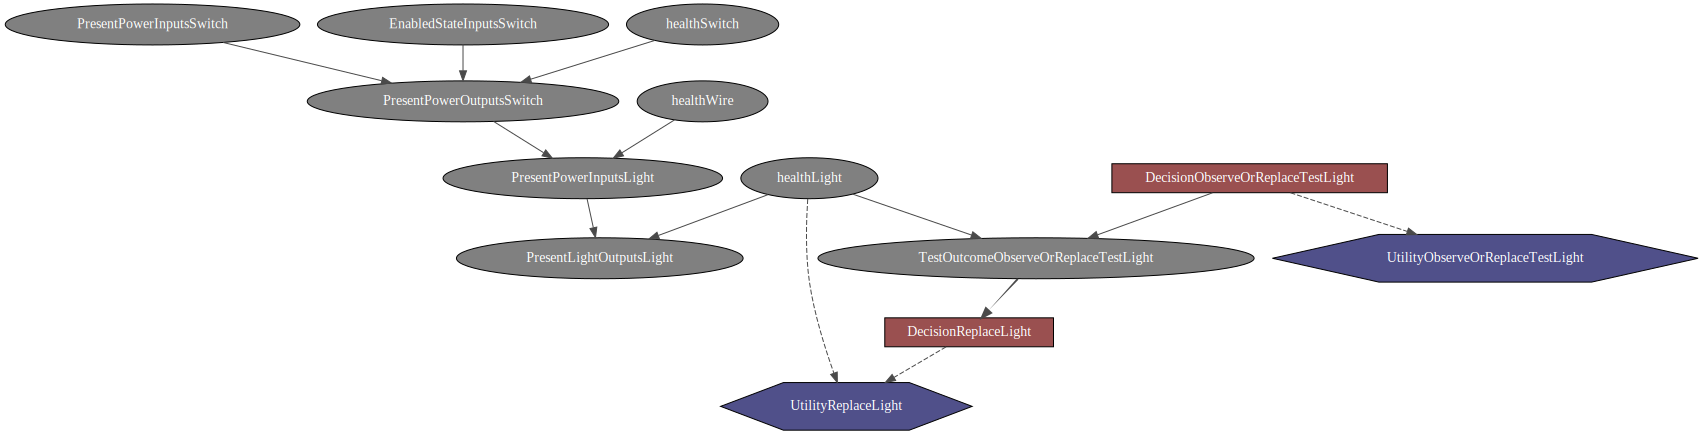

In [160]:
gnb.showInfluenceDiagram(diagram, size=60)

In [161]:
diagram.cpt(diagram.idFromName("healthLight"))

(pyAgrum.Potential<double>@0x40b80490) 
  healthLight      |
ok       |broken   |
---------|---------|
 0.9900  | 0.0100  |

In [162]:
diagram.utility("UtilityReplaceLight")

(pyAgrum.Potential<double>@0x402acb60) 
             ||  Utility|
Decisi|health||0        |
------|------||---------|
yes   |ok    || -5.0000 |
no    |ok    || 0.0000  |
yes   |broken|| -2.0000 |
no    |broken|| -4.0000 |